In [49]:
from collections import defaultdict, Counter
import json

Create Node data from event_types and processed edges.

Create Edge data from event_log.

In [2]:
journey_rawdata = open("data/journey.csv").readlines()
print(journey_rawdata[:5])

['1624,9\n', '1624,5\n', '1624,9\n', '1624,40\n', '1624,40\n']


In [52]:
groups = json.load(open("data/event_groupings.json"))

In [53]:
journeys = defaultdict(list)
for line in journey_rawdata:
    customer, event = line.split(',')
    event = groups["Type_to_group"][event[:-1]]
    customer = int(customer)
    journeys[customer].append(event)

In [54]:
journey_keys = iter(journeys.keys())
journeys[next(journey_keys)]

[0, 4]

In [57]:
def pairs(events, length_cap):
    events = list(enumerate(events[:length_cap]))
    return [(events[i], events[i+1]) for i in range(len(events) - 1)]

# >> pairs([1,5,5,27,3],2)
# [((0, 1), (1, 5))]

1. get set of pairs that actually occur - looks like all or close. XX
1. output to a file and record indices, ie create dict{pair: index}
1. create counter of union of journeys: dict(pair of pairs : count) XX
1. use lookup dict to map keys to dict(pair of indices : count)
1. output

What about subscription status? What can we glean from this file?

Definitely need to create groupings of event_types.

```
enumerate the possible nodes (0-20, 0-13), 260 of them. Gives:
(index, (event_number, event_group))
create func to create json for (index, (event_number, event_group)) -> [{name: groups["Groups"][event_group]}]
create dict:
{(event_number, event_group): index}
use dict to map edges:
(((num, grp), (num, grp)), count) -> {source: index, target: index, value: count}
```

In [73]:
journey_segments = []
for j in journeys.values():
    journey_segments.extend(pairs(j, 20))

In [74]:
c = Counter(journey_segments)

In [69]:
lengths = []
for acct, j in journeys.items():
    if len(j) < 20:
        lengths.append(len(j))
print(max(lengths))

19


In [63]:
sorted(lengths)[-1000]

323

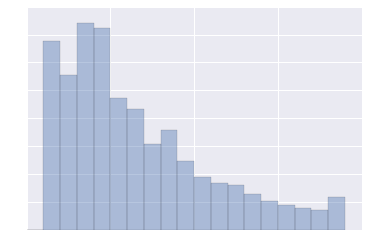

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(lengths, bins=range(20), kde=False)

In [67]:
sns.distplot?